In [613]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List, Union
import random

In [614]:
from typing import Literal


class AgentState(TypedDict): 
    player_name: str
    guesses: List[int] = []
    attempts: int = 0
    magic_number: int
    lower_bound: int = 1
    upper_bound: int = 20
    hint: Union[Literal['higher', 'lower'],None]

In [615]:
def setup(state: AgentState) -> AgentState:
    """Setting up the game"""
    state["player_name"] = f"Hey, {state['player_name']}, let's have a game!"
    print(state['player_name'])
    return state
 
def guess(state: AgentState) -> AgentState:
    """Perform guessing"""

    if state['hint'] == 'higher' and len(state['guesses']) > 0:
        state['lower_bound'] = state['guesses'][-1]
    elif state['hint'] == 'lower' and len(state['guesses']) > 0:
        state['upper_bound'] = state['guesses'][-1]

    state['attempts'] += 1

    guess = random.randint(state['lower_bound'], state['upper_bound'])

    if guess not in state['guesses']:
        state['guesses'].append(guess)
    else:
        state['guesses'].append(random.randint(state['lower_bound'], state['upper_bound']))   

    return state

def hint(state: AgentState) -> AgentState:
   """Hint"""
   latest_guess = state['guesses'][-1]
   if latest_guess > state['magic_number']:
       state['hint'] = 'lower'
   else: 
       state['hint'] = 'higher'

   return state

def should_continue(state: AgentState) -> AgentState: 
    """Should continue"""
    latest_guess = state['guesses'][-1]

    if state['attempts'] >= 7:
        print(f"Damn, you lost the game! Start a new round.")
        return 'exit'

    if state['magic_number'] == latest_guess:
       print(f"You have won in {state['attempts']}")
       return 'exit'

    print(f"Unfortunately, that was not correct! Please try again.")

    return 'try_again'


In [616]:
graph = StateGraph(AgentState)

graph.add_node('setup_node', setup)
graph.add_node('guess_node', guess)
graph.add_node('hint_node', hint)

graph.set_entry_point('setup_node')

graph.add_edge('setup_node', 'guess_node')
graph.add_edge('guess_node', 'hint_node')

graph.add_conditional_edges(
    'hint_node',
    should_continue,
    {
        'try_again': 'guess_node',
        'exit': END
    }
)


app = graph.compile()


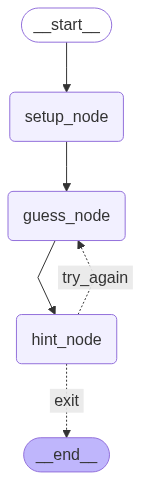

In [617]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [618]:
app.invoke({
    'player_name': "Max",
    'magic_number': 5,
    'hint': None,
    'upper_bound': 20,
    'lower_bound': 1,
    'guesses': [],
    'attempts': 0
    
})



Hey, Max, let's have a game!
You have won in 1


{'player_name': "Hey, Max, let's have a game!",
 'guesses': [5],
 'attempts': 1,
 'magic_number': 5,
 'lower_bound': 1,
 'upper_bound': 20,
 'hint': 'higher'}